In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# New Section

In [2]:
df=pd.read_csv("../input/traincsv/train.csv")
print(df)

    battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0             842     0          2.2         0   1       0           7    0.6   
1            1021     1          0.5         1   0       1          53    0.7   
2             563     1          0.5         1   2       1          41    0.9   
3             615     1          2.5         0   0       0          10    0.8   
4            1821     1          1.2         0  13       1          44    0.6   
..            ...   ...          ...       ...  ..     ...         ...    ...   
94           1322     0          1.7         1   6       0           7    0.8   
95           1137     1          1.0         0  18       0           7    1.0   
96           1355     0          2.3         0  10       1          23    0.2   
97           1665     1          0.5         0   3       1          60    0.2   
98            657     0          2.5         0   0       0          37    0.7   

    mobile_wt  n_cores  ...

In [3]:
df.max()

battery_power    1977.0
blue                1.0
clock_speed         3.0
dual_sim            1.0
fc                 18.0
four_g              1.0
int_memory         64.0
m_dep               1.0
mobile_wt         200.0
n_cores             8.0
pc                 20.0
px_height        1725.0
px_width         1990.0
ram              3993.0
sc_h               19.0
sc_w               17.0
talk_time          20.0
three_g             1.0
touch_screen        1.0
wifi                1.0
price_range         3.0
dtype: float64

In [4]:
x= df.iloc[:,[1,8]]
y= df.iloc[:,3]
print(x)

    blue  mobile_wt
0      0        188
1      1        136
2      1        145
3      1        131
4      1        141
..   ...        ...
94     0        140
95     1        196
96     0        132
97     1        194
98     0        141

[99 rows x 2 columns]


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=0)
print(x_train)

    blue  mobile_wt
48     1        162
6      0        139
98     0        141
82     1        180
76     0        197
..   ...        ...
95     1        196
67     0        182
64     0        141
47     1        196
44     1        110

[74 rows x 2 columns]


In [6]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)
print(x_test)

[[ 1.         -0.31446255]
 [ 1.          1.13449317]
 [ 1.          0.06226593]
 [-1.         -1.12587776]
 [-1.          1.30836785]
 [-1.         -1.15485687]
 [-1.          1.54020077]
 [-1.         -0.05365052]
 [ 1.          0.06226593]
 [-1.         -0.08262964]
 [-1.         -1.18383598]
 [ 1.          0.81572291]
 [ 1.         -0.77812838]
 [ 1.          1.598159  ]
 [-1.          1.27938874]
 [ 1.         -1.58954359]
 [-1.          1.62713811]
 [-1.         -0.92302395]
 [ 1.         -1.24179421]
 [ 1.          0.90266025]
 [-1.          0.67082734]
 [ 1.          0.46797354]
 [ 1.         -0.34344167]
 [ 1.         -1.12587776]
 [-1.         -0.72017015]]


In [7]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train )
y_pred=classifier.predict(x_test)
print(y_pred)



[0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1]


In [8]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 3  5]
 [ 7 10]]


<function matplotlib.pyplot.show(close=None, block=None)>

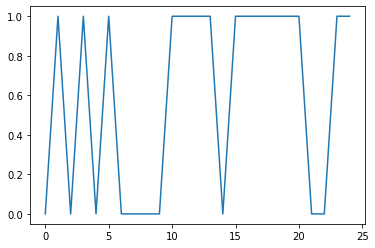

In [9]:
import matplotlib.pyplot as plt
import numpy as np
y_pred=classifier.predict(x_test)
plt.plot(y_pred)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

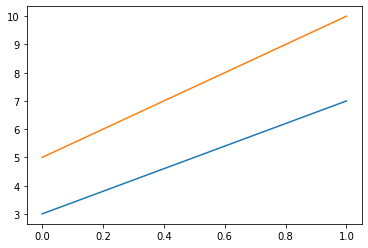

In [10]:
cm=confusion_matrix(y_test,y_pred)
plt.plot(cm)
plt.show


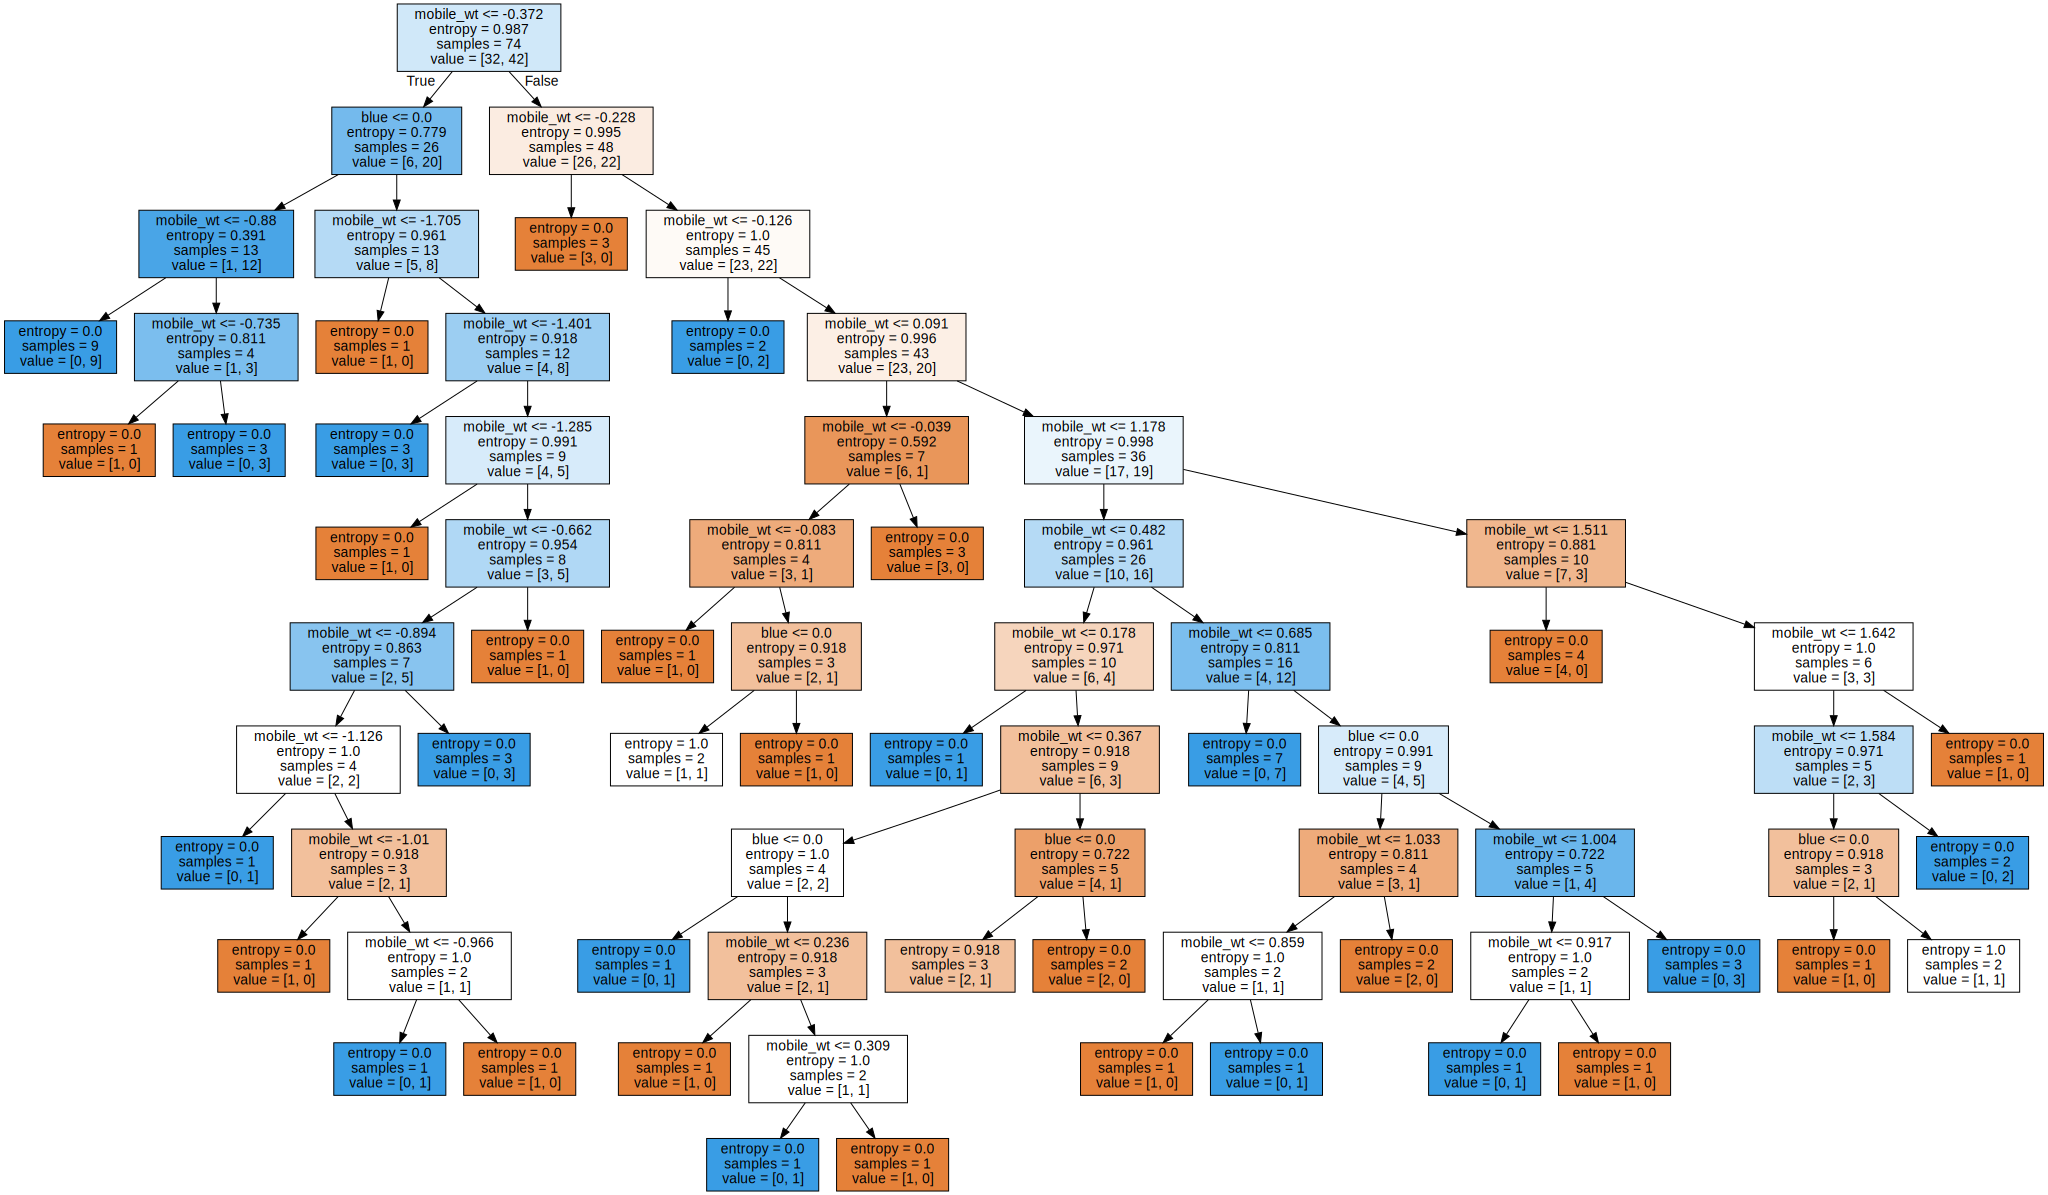

In [11]:
from sklearn.tree import export_graphviz
import graphviz
graphviz.Source(export_graphviz(classifier,feature_names=x.columns,filled=True))